In [211]:
import numpy as np
import spacy
import os
import glob
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import plotly.express as plot
import matplotlib.pyplot as mat
import itertools
import networkx as net
import collections
from nltk import bigrams
import dateutil
import nltk 
nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords
stp=set(stopwords.words("english"))
import nltk
nltk.download('punkt')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#importing the file
from google.colab import files
upload = files.upload()


Saving 2010.csv to 2010 (2).csv
Saving 2011.csv to 2011 (1).csv
Saving 2012.csv to 2012 (1).csv
Saving 2013.csv to 2013 (1).csv
Saving 2014.csv to 2014 (1).csv
Saving 2015.csv to 2015 (1).csv
Saving 2016.csv to 2016 (1).csv
Saving 2017.csv to 2017 (1).csv
Saving 2018.csv to 2018 (1).csv
Saving 2019.csv to 2019 (1).csv
Saving 2020.csv to 2020 (1).csv
Saving 2021.csv to 2021 (1).csv
Saving 2022.csv to 2022 (1).csv


In [213]:
#Readind the data
elon_2017 = pd.read_csv('2017.csv')
elon_2018 = pd.read_csv('2018.csv')
elon_2019 = pd.read_csv('2019.csv')
elon_2020 = pd.read_csv('2020.csv')
elon_2021 = pd.read_csv('2021.csv')
elon_2022 = pd.read_csv('2022.csv')
dat = pd.DataFrame()
for file in upload:
            all = pd.read_csv(file)
            dat = dat.append(all, ignore_index=True)
dat

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34873,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
34874,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
34875,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
34876,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


In [16]:
dat = dat[['date','tweet']].copy(deep =True)
dat

,date,tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon..."
1,2011-12-28 22:27:08,@TheOnion So true :)
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki..."
...,...,...
34873,2022-01-03,https://t.co/LA9hPzVlGx
34874,2022-01-02,Let’s make the roaring 20’s happen!
34875,2022-01-02,Great work by Tesla team worldwide!
34876,2022-01-01,@BLKMDL3 @Tesla 🔥


In [214]:
#data wrangling
def cleaning(tweet):
  '''
  ARGS: Tweet data from the dataset is cleaned for much easier computation
  Returns: Cleaned data
  '''
  tweet = re.sub("[@&#][A-Za-z0-9_]+"," ", str(tweet).lower())
  tweet = re.sub(r'http\S+', ' ', tweet)
  tweet = re.sub(r"www.\S+", " ", tweet)
  tweet = re.sub('[()!?]', ' ', tweet)
  tweet = re.sub('\[.*?\]',' ', tweet) 
  tweet = re.sub("[^a-z0-9]"," ", tweet)
  tweet = re.sub(r'[0-9]+', ' ', tweet)
  tweet_token = word_tokenize(tweet)
  edited_phrase = [w for w in tweet_token if not w in set(stopwords.words("english"))]

  if len( edited_phrase)==0:
    return float('NaN')
  else:
    return ' '.join(edited_phrase)
    

In [215]:
dat = dat.astype(str)

In [216]:
def arranging_dates(date):
    return dateutil.parser.parse(date)
dat['tweet']=dat['tweet'].apply(cleaning)
dat['date']= dat['date'].apply(arranging_dates)

In [217]:
def year(date):
    return date.year
dat['year'] = dat['date'].apply(year)
dat = dat[dat['tweet'].notna()]

In [218]:
#Frequecy of words
def frqn(document):
    return nltk.FreqDist(document)
w_2017= frqn(word_tokenize(' '.join(dat[dat['year']==2017]['tweet'])))
w_2018= frqn(word_tokenize(' '.join(dat[dat['year']==2018]['tweet'])))
w_2019= frqn(word_tokenize(' '.join(dat[dat['year']==2019]['tweet'])))
w_2020= frqn(word_tokenize(' '.join(dat[dat['year']==2020]['tweet'])))
w_2021= frqn(word_tokenize(' '.join(dat[dat['year']==2021]['tweet'])))
w_2022= frqn(word_tokenize(' '.join(dat[dat['year']==2022]['tweet'])))

In [219]:
#top 10 frequently used words in 2017
top_words_2017 = pd.DataFrame(w_2017.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2017.head(10)


,word,Freq
104,tesla,222
56,model,177
156,yes,162
64,good,159
37,like,147
62,one,138
16,first,129
52,next,129
8,yeah,117
113,would,108


In [156]:
#top 10 frequently used words in 2018
top_words_2018 = pd.DataFrame(w_2018.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2018.head(10)

,word,Freq
1,tesla,877
112,car,363
28,yes,324
187,good,308
134,model,294
102,like,285
285,would,231
70,people,222
206,even,195
64,next,192


In [163]:
#top 10 frequently used words in 2019
top_words_2019 = pd.DataFrame(w_2019.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2019.head(10)

,word,Freq
195,tesla,504
106,yes,307
55,would,198
191,great,193
162,starship,189
487,like,170
42,good,169
360,high,148
51,much,144
206,time,141


In [157]:
#top10 frequently used words in 2020
top_words_2020 = pd.DataFrame(w_2020.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2020.head(10)

,word,Freq
11,tesla,191
74,yes,160
25,great,128
200,much,120
51,good,112
393,would,94
339,high,91
125,sure,88
208,yeah,83
126,haha,83


In [158]:
#top10 frequently used words in 2021
top_words_2021 = pd.DataFrame(w_2021.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2021.head(10)

,word,Freq
48,tesla,213
65,great,102
143,good,98
111,much,93
156,would,89
96,haha,89
117,like,89
32,time,86
807,beta,77
927,high,74


In [159]:
#top10 frequently used words in 2022
top_words_2022 = pd.DataFrame(w_2022.items(),columns =['word','Freq']).sort_values(['Freq'],ascending =False)
top_words_2022.head(10)


,word,Freq
63,tesla,62
54,people,34
60,would,32
107,yes,32
245,one,30
323,good,28
7,starlink,28
158,car,26
686,true,22
134,high,22


In [224]:
#histogram for all the years
plot.histogram(top_words_2017, x ='Freq', nbins =35)

In [161]:
plot.histogram(top_words_2018, x ='Freq', nbins =35)

In [164]:
plot.histogram(top_words_2019, x ='Freq', nbins =35)

In [165]:
plot.histogram(top_words_2020, x ='Freq', nbins =35)

In [166]:
plot.histogram(top_words_2021, x ='Freq', nbins =35)

In [45]:
plot.histogram(top_words_2022, x ='Freq', nbins =35)

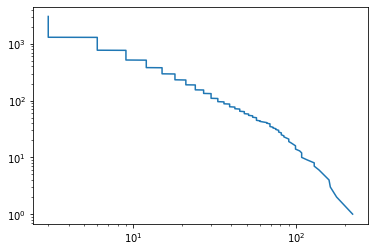

In [167]:
top_words_2017['RK'] = range(1,len(top_words_2017)+1)
top_words_2018['RK'] = range(1,len(top_words_2018)+1)
top_words_2019['RK'] = range(1,len(top_words_2019)+1)
top_words_2020['RK'] = range(1,len(top_words_2020)+1)
top_words_2021['RK'] = range(1,len(top_words_2021)+1)
top_words_2022['RK'] = range(1,len(top_words_2022)+1)
mat.loglog(top_words_2017['Freq'], top_words_2017['RK'])


Text(0, 0.5, 'RK')

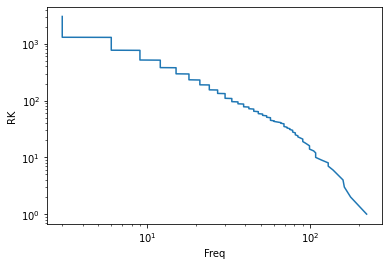

In [168]:
#lolog plots for all theyears
mat.loglog(top_words_2017['Freq'], top_words_2017['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

Text(0, 0.5, 'RK')

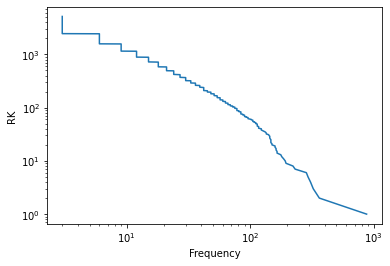

In [153]:
mat.loglog(top_words_2018['Freq'], top_words_2018['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

Text(0, 0.5, 'Rank')

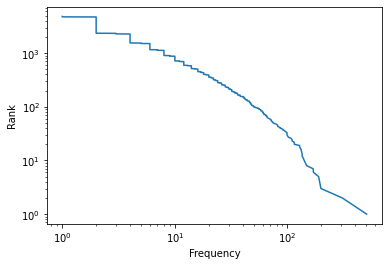

In [52]:
mat.loglog(top_words_2019['Freq'], top_words_2019['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

Text(0, 0.5, 'RK')

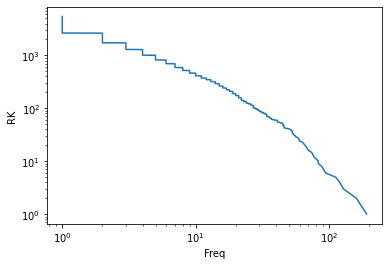

In [169]:
mat.loglog(top_words_2020['Freq'], top_words_2020['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

Text(0, 0.5, 'RK')

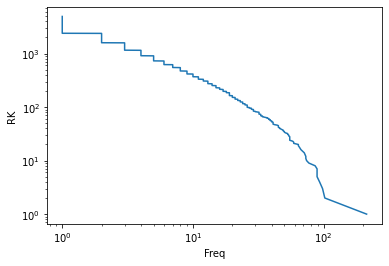

In [170]:
mat.loglog(top_words_2021['Freq'], top_words_2021['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

Text(0, 0.5, 'RK')

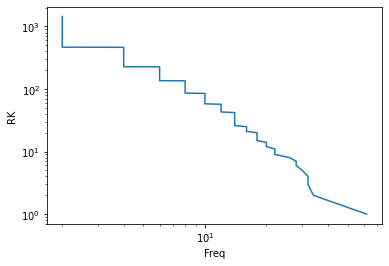

In [171]:
mat.loglog(top_words_2022['Freq'], top_words_2022['RK'])
mat.xlabel('Freq')
mat.ylabel('RK')

In [172]:
dat = dat[['date','tweet','year']].copy(deep =True)
dat

,date,tweet,year
0,2010-06-04 18:31:57,please ignore prior tweets someone pretending ...,2010
1,2011-12-28 22:27:08,true,2011
2,2011-12-27 23:38:55,ever wanted know real truth moon landings best...,2011
3,2011-12-26 16:29:50,walked around neighborhood recently rebuilt he...,2011
4,2011-12-26 16:23:04,xmas brought presents kids orphanage usually g...,2011
...,...,...,...
34870,2022-01-03 00:00:00,reminds hex edited ultima v get final maze,2022
34871,2022-01-03 00:00:00,yay switzerland,2022
34872,2022-01-03 00:00:00,way touch voters three generations away voting...,2022
34874,2022-01-02 00:00:00,let make roaring happen,2022


In [193]:
# Tokenization
def tokenization(string):
    return word_tokenize(string)
dat['Tokens'] = dat['tweet'].apply(tokenization)
#  bi-grams for the year 2017
network_2017 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2017]['Tokens']]
network_2017

[[('coming', 'soon')],
 [('vastly', 'better'),
  ('better', 'maps'),
  ('maps', 'nav'),
  ('nav', 'coming'),
  ('coming', 'soon')],
 [],
 [],
 [('yeah', 'terrible'),
  ('terrible', 'upgrade'),
  ('upgrade', 'old'),
  ('old', 'linux'),
  ('linux', 'os'),
  ('os', 'bunch'),
  ('bunch', 'drivers'),
  ('drivers', 'first'),
  ('first', 'major'),
  ('major', 'browser'),
  ('browser', 'upgrades'),
  ('upgrades', 'coming'),
  ('coming', 'cars'),
  ('cars', 'months'),
  ('months', 'note'),
  ('note', 'slower'),
  ('slower', 'first'),
  ('first', 'code'),
  ('code', 'optimized')],
 [('similar', 'total'),
  ('total', 'size'),
  ('size', 'maybe'),
  ('maybe', 'slightly'),
  ('slightly', 'bigger'),
  ('bigger', 'account'),
  ('account', 'really'),
  ('really', 'gamechanging'),
  ('gamechanging', 'think'),
  ('think', 'feature'),
  ('feature', 'like'),
  ('like', 'add')],
 [('sustainable', 'energy'),
  ('energy', 'production'),
  ('production', 'solar'),
  ('solar', 'batteries'),
  ('batteries', 'gr

In [191]:
#extracting bi grams for all the years
list_2017= list(itertools.chain(*network_2017))

count_2017 = collections.Counter(list_2017)
all_bigram= pd.DataFrame(count_2017.most_common(10),
                             columns=['bigram', 'count'])
all_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


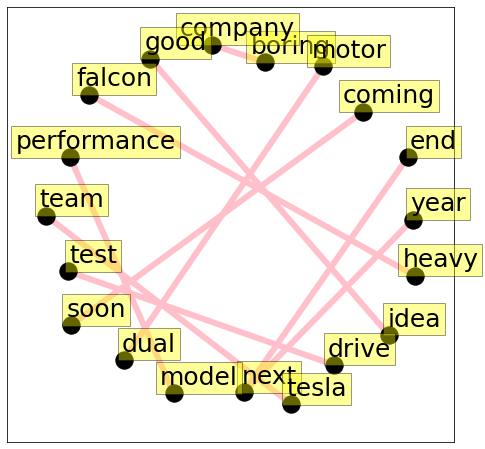

In [223]:
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
H = net.Graph()

for j, b in dict_bigram[0].items():
    H.add_edge(j[0], j[1])
fig, axi = mat.subplots(figsize=(8, 8))
post = net.spring_layout(H, k=3)

net.draw_networkx(H, post,
                 font_size=13,
                 width=6,
                 edge_color='pink',
                 node_color='black',
                 with_labels = False,
                 ax=axi)

for key, value in post.items():
    m, n = value[0]+.135, value[1]+.045
    axi.text(m, n,
            s=key,
            bbox=dict(facecolor='yellow', alpha=0.40),
            horizontalalignment='center', fontsize=25)
    
mat.show()

In [69]:
network_2018 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2018]['Tokens']]
network_2018

[[('thanks', 'tesla'),
  ('tesla', 'owners'),
  ('owners', 'china'),
  ('china', 'looking'),
  ('looking', 'forward'),
  ('forward', 'visiting'),
  ('visiting', 'soon'),
  ('soon', 'groundbreaking'),
  ('groundbreaking', 'gigafactory'),
  ('gigafactory', 'shanghai')],
 [('turns', 'take'),
  ('take', 'dayquil'),
  ('dayquil', 'exit'),
  ('exit', 'matrix')],
 [('excited', 'larry'),
  ('larry', 'ellison'),
  ('ellison', 'kathleen'),
  ('kathleen', 'wilson'),
  ('wilson', 'thompson'),
  ('thompson', 'join'),
  ('join', 'tesla'),
  ('tesla', 'board')],
 [],
 [('tesla', 'team'), ('team', 'great'), ('great', 'job')],
 [],
 [('provide', 'detailed'),
  ('detailed', 'explanation'),
  ('explanation', 'march'),
  ('march', 'april')],
 [('time', 'although'),
  ('although', 'also'),
  ('also', 'turned'),
  ('turned', 'dramatically'),
  ('dramatically', 'better')],
 [],
 [],
 [('probability', 'rising'),
  ('rising', 'rapidly'),
  ('rapidly', 'due'),
  ('due', 'new'),
  ('new', 'architecture')],
 [],


In [194]:
list_2018= list(itertools.chain(*network_2018))

count_2018 = collections.Counter(list_2018)
all_bigram= pd.DataFrame(count_2018.most_common(10),
                             columns=['bigram', 'count'])
all_bigram

,bigram,count
0,"(next, year)",75
1,"(coming, soon)",66
2,"(boring, company)",48
3,"(falcon, heavy)",42
4,"(tesla, team)",35
5,"(good, idea)",33
6,"(dual, motor)",33
7,"(test, drive)",30
8,"(end, next)",30
9,"(model, performance)",30


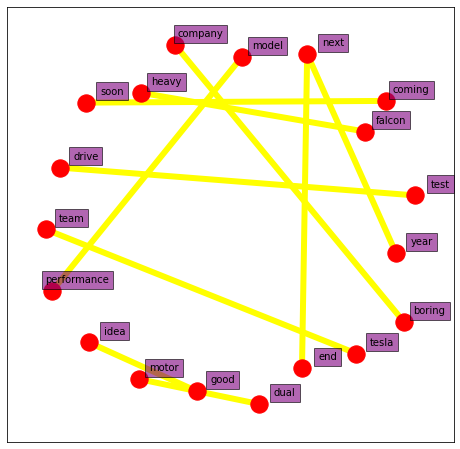

In [207]:
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
# network plot 
F = net.Graph()
for j, b in dict_bigram[0].items():
    F.add_edge(j[0], j[1])
fig, axi = mat.subplots(figsize=(8, 8))
p = net.spring_layout(F, k=6)

net.draw_networkx(F, p,
                 font_size=10,
                 width=6,
                 edge_color='yellow',
                 node_color='red',
                 with_labels = False,
                 ax=axi)
for key, value in p.items():
    m, n = value[0]+.135, value[1]+.045
    axi.text(m, n,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.60),
            horizontalalignment='center', fontsize=10)
    
mat.show()

In [77]:
network_2019 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2019]['Tokens']]
network_2019

[[('pretty', 'awful'),
  ('awful', 'lie'),
  ('lie', 'left'),
  ('left', 'south'),
  ('south', 'africa'),
  ('africa', 'backpack'),
  ('backpack', 'suitcase'),
  ('suitcase', 'books'),
  ('books', 'worked'),
  ('worked', 'mom'),
  ('mom', 'cousin'),
  ('cousin', 'farm'),
  ('farm', 'saskatchewan'),
  ('saskatchewan', 'lumber'),
  ('lumber', 'mill'),
  ('mill', 'vancouver'),
  ('vancouver', 'went'),
  ('went', 'queens'),
  ('queens', 'univ'),
  ('univ', 'scholarship'),
  ('scholarship', 'debt'),
  ('debt', 'upenn'),
  ('upenn', 'wharton'),
  ('wharton', 'stanford')],
 [('person', 'blocked'),
  ('blocked', 'read'),
  ('read', 'tweet'),
  ('tweet', 'whats'),
  ('whats', 'deal')],
 [('started', 'zip'),
  ('zip', 'k'),
  ('k', 'plus'),
  ('plus', 'overclocked'),
  ('overclocked', 'home'),
  ('home', 'built'),
  ('built', 'pc'),
  ('pc', 'k'),
  ('k', 'bro'),
  ('bro', 'k'),
  ('k', 'greg'),
  ('greg', 'kouri'),
  ('kouri', 'good'),
  ('good', 'guy'),
  ('guy', 'greatly'),
  ('greatly', 'mis

In [79]:
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')

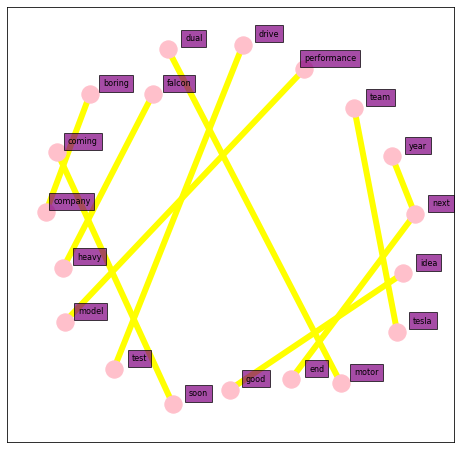

In [221]:
list_2019= list(itertools.chain(*network_2019))

count_2019 = collections.Counter(list_2019)
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
# network plot 
F = net.Graph()
for j, b in dict_bigram[0].items():
    F.add_edge(j[0], j[1])
fig, axi = mat.subplots(figsize=(8, 8))
position = net.spring_layout(J, k=6)

net.draw_networkx(J, position,
                 font_size=10,
                 width=6,
                 edge_color='yellow',
                 node_color='pink',
                 with_labels = False,
                 ax=axi)


for key, value in position.items():
    x, y = value[0]+.135, value[1]+.045
    axi.text(x, y,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.70),
            horizontalalignment='center', fontsize=8)
    
mat.show()

In [82]:
network_2020 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2020]['Tokens']]
network_2020

[[('entertainment', 'critical'), ('critical', 'cars'), ('cars', 'drive')],
 [('meeting', 'larry'),
  ('larry', 'ellison'),
  ('ellison', 'seek'),
  ('seek', 'advice'),
  ('advice', 'back'),
  ('back', 'working'),
  ('working', 'tesla'),
  ('tesla', 'end'),
  ('end', 'quarter'),
  ('quarter', 'tomorrow')],
 [],
 [('tesla', 'car'),
  ('car', 'gaming'),
  ('gaming', 'autonomous'),
  ('autonomous', 'world')],
 [],
 [('taste', 'future')],
 [('try', 'playing'),
  ('playing', 'polytopia'),
  ('polytopia', 'tesla'),
  ('tesla', 'great'),
  ('great', 'game'),
  ('game', 'multiplayer'),
  ('multiplayer', 'online'),
  ('online', 'version'),
  ('version', 'coming'),
  ('coming', 'soon')],
 [('focus', 'making'),
  ('making', 'products'),
  ('products', 'services'),
  ('services', 'people'),
  ('people', 'truly'),
  ('truly', 'love'),
  ('love', 'total'),
  ('total', 'economic'),
  ('economic', 'pie'),
  ('pie', 'bigger'),
  ('bigger', 'instead'),
  ('instead', 'engaging'),
  ('engaging', 'zero'),
 

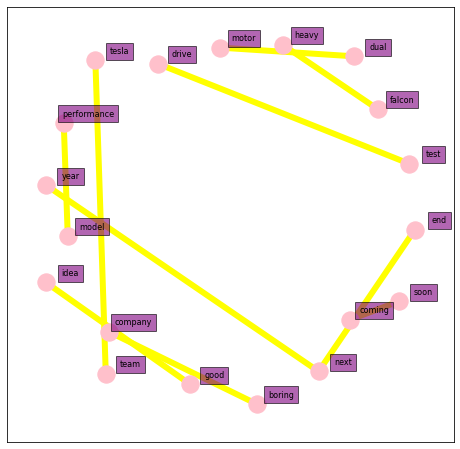

In [209]:
Q = net.Graph()

for k, v in dict_bigram[0].items():
    Q.add_edge(k[0], k[1])
list_2020= list(itertools.chain(*network_2020))

c_2020 = collections.Counter(list_2020)
fig, axi = mat.subplots(figsize=(8, 8))
p = net.spring_layout(Q, k=6)

# Plot networks
net.draw_networkx(Q, p,
                 font_size=10,
                 width=6,
                 edge_color='yellow',
                 node_color='pink',
                 with_labels = False,
                 ax=axi)

#  offset labels
for key, value in p.items():
    m, n = value[0]+.125, value[1]+.035
    axi.text(m, n,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.60),
            horizontalalignment='center', fontsize=8)
    
mat.show()

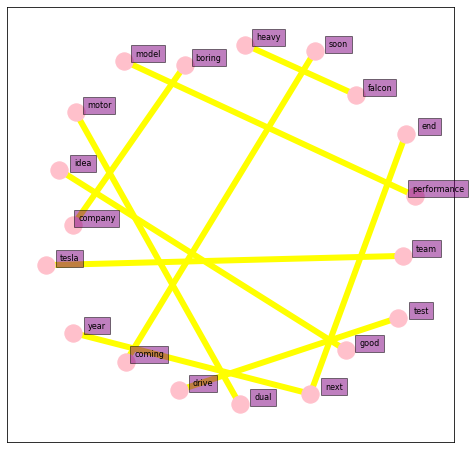

In [220]:
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
L= net.Graph()

for k, v in dict_bigram[0].items():
    L.add_edge(k[0], k[1])
fig, axi = mat.subplots(figsize=(8, 8))
p = net.spring_layout(L, k=6)

net.draw_networkx(L,p,
                 font_size=10,
                 width=6,
                 edge_color='yellow',
                 node_color='pink',
                 with_labels = False,
                 ax=axi)

#  offset labels
for key, value in p.items():
    m, n = value[0]+.125, value[1]+.025
    axi.text(m, n,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
mat.show()

In [88]:
network_2021 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2020]['Tokens']]
network_2021

[[('entertainment', 'critical'), ('critical', 'cars'), ('cars', 'drive')],
 [('meeting', 'larry'),
  ('larry', 'ellison'),
  ('ellison', 'seek'),
  ('seek', 'advice'),
  ('advice', 'back'),
  ('back', 'working'),
  ('working', 'tesla'),
  ('tesla', 'end'),
  ('end', 'quarter'),
  ('quarter', 'tomorrow')],
 [],
 [('tesla', 'car'),
  ('car', 'gaming'),
  ('gaming', 'autonomous'),
  ('autonomous', 'world')],
 [],
 [('taste', 'future')],
 [('try', 'playing'),
  ('playing', 'polytopia'),
  ('polytopia', 'tesla'),
  ('tesla', 'great'),
  ('great', 'game'),
  ('game', 'multiplayer'),
  ('multiplayer', 'online'),
  ('online', 'version'),
  ('version', 'coming'),
  ('coming', 'soon')],
 [('focus', 'making'),
  ('making', 'products'),
  ('products', 'services'),
  ('services', 'people'),
  ('people', 'truly'),
  ('truly', 'love'),
  ('love', 'total'),
  ('total', 'economic'),
  ('economic', 'pie'),
  ('pie', 'bigger'),
  ('bigger', 'instead'),
  ('instead', 'engaging'),
  ('engaging', 'zero'),
 

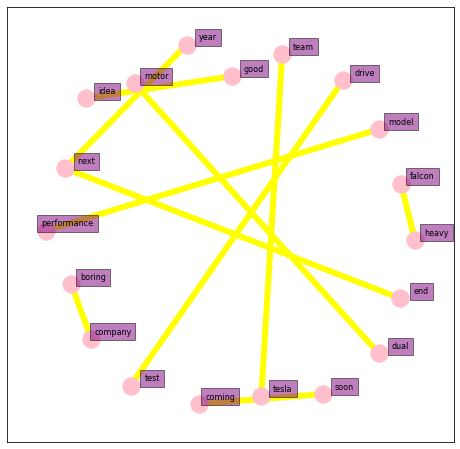

In [210]:
list_2021= list(itertools.chain(*network_2021))

count_2021= collections.Counter(list_2021)
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
M= net.Graph()

for k, v in dict_bigram[0].items():
    M.add_edge(k[0], k[1])
fig, ax = mat.subplots(figsize=(8, 8))
p = net.spring_layout(M, k=6)

net.draw_networkx(M, p,
                 font_size=10,
                 width=6,
                 edge_color='Yellow',
                 node_color='pink',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in p.items():
    m, n = value[0]+.115, value[1]+.025
    ax.text(m, n,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
mat.show()

In [94]:
network_2022 = [list(bigrams(tweet)) for tweet in dat[dat['year']==2022]['Tokens']]
network_2022

[[('way', 'free'), ('free', 'qa'), ('qa', 'haha')],
 [('beautiful', 'home'), ('home', 'life')],
 [('starlink', 'terminals'),
  ('terminals', 'near'),
  ('near', 'conflict'),
  ('conflict', 'areas'),
  ('areas', 'jammed'),
  ('jammed', 'several'),
  ('several', 'hours'),
  ('hours', 'time'),
  ('time', 'latest'),
  ('latest', 'software'),
  ('software', 'update'),
  ('update', 'bypasses'),
  ('bypasses', 'jamming'),
  ('jamming', 'curious'),
  ('curious', 'see'),
  ('see', 'next')],
 [],
 [('news', 'sources'),
  ('sources', 'partially'),
  ('partially', 'propaganda'),
  ('propaganda', 'others')],
 [('starlink', 'told'),
  ('told', 'governments'),
  ('governments', 'ukraine'),
  ('ukraine', 'block'),
  ('block', 'russian'),
  ('russian', 'news'),
  ('news', 'sources'),
  ('sources', 'unless'),
  ('unless', 'gunpoint'),
  ('gunpoint', 'sorry'),
  ('sorry', 'free'),
  ('free', 'speech'),
  ('speech', 'absolutist')],
 [('spacex', 'reprioritized'),
  ('reprioritized', 'cyber'),
  ('cyber', '

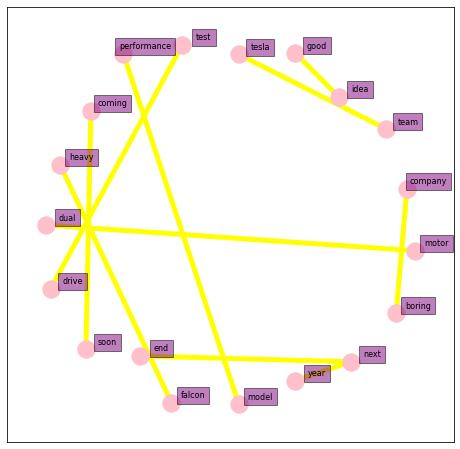

In [222]:

list_2022= list(itertools.chain(*network_2022))

count_2022= collections.Counter(list_2022)
dict_bigram=all_bigram.set_index('bigram').T.to_dict('records')
O= net.Graph()

for k, v in dict_bigram[0].items():
    O.add_edge(k[0], k[1])
fig, axi = mat.subplots(figsize=(8, 8))
p = net.spring_layout(O,k=6)


net.draw_networkx(O, p,
                 font_size=10,
                 width=5,
                 edge_color='yellow',
                 node_color='pink',
                 with_labels = False,
                 ax=axi)

for key, value in p.items():
    m, n = value[0]+.115, value[1]+.025
    axi.text(m, n,
            s=key,
            bbox=dict(facecolor='purple', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
mat.show()